# Weighted_gene_co-expression_network_analysis_WGCNA

## import libraries

In [1]:
#import libraries
suppressMessages({
    library('gplots')
    library('ggplot2')
    library('knitr')
    #library('limma')
    library('reshape2')
    library('RColorBrewer')
    library('WGCNA')
    library("broman")
})

In [2]:
# Make sure results are reproducible
set.seed(1)

In [7]:
setwd("/home/nhk/Desktop/")
samples <- read.csv('metadata_WGCNA_analysis.csv')
kable(samples)



|sample_id  |condition |
|:----------|:---------|
|Illu_6m_1  |young     |
|Illu_6m_2  |young     |
|Illu_6m_3  |young     |
|Illu_6m_4  |young     |
|Illu_24m_1 |aged      |
|Illu_24m_2 |aged      |
|Illu_24m_3 |aged      |
|Illu_24m_4 |aged      |

In [12]:
raw_counts <- read.csv('For_WGCNA_analysis.csv', row.names=1)
head(raw_counts, 2)

,Illu_6m_1,Illu_6m_2,Illu_6m_3,Illu_6m_4,Illu_24m_1,Illu_24m_2,Illu_24m_3,Illu_24m_4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000092329,0.5894619,0.7222311,0.7228326,0.7053493,1.2771674,1.3215174,1.5121902,1.5633972
ENSMUSG00000007777,1.3009009,1.2444444,1.2461261,1.1413814,0.8586186,0.7183183,0.7717718,0.7203604


In [6]:
dim(raw_counts)
raw_counts_norm = normalize(raw_counts)
rownames(raw_counts_norm) = rownames(raw_counts)
colnames(raw_counts_norm) = colnames(raw_counts)
raw_counts = raw_counts_norm

[1] 16066     8

In [7]:
write.csv(raw_counts_norm,"/run/user/1002/gvfs/smb-share:server=wfs-medizin.top.gwdg.de,share=ukps-all$//AG-Fornasiero//LAB//Public//Nisha/Transcriptomics/Jena_Nano_Illu/WGNCA/Illu_QN_filtered_based_on_6m_24m.csv")

In [149]:
#write.csv(raw_counts_norm,"/home/nisha/WGNCA/Test/rawcounts_filtered_normalized.csv")

Warning message in brewer.pal(num_conditions, "Set1"):
“minimal value for n is 3, returning requested palette with 3 different levels
”


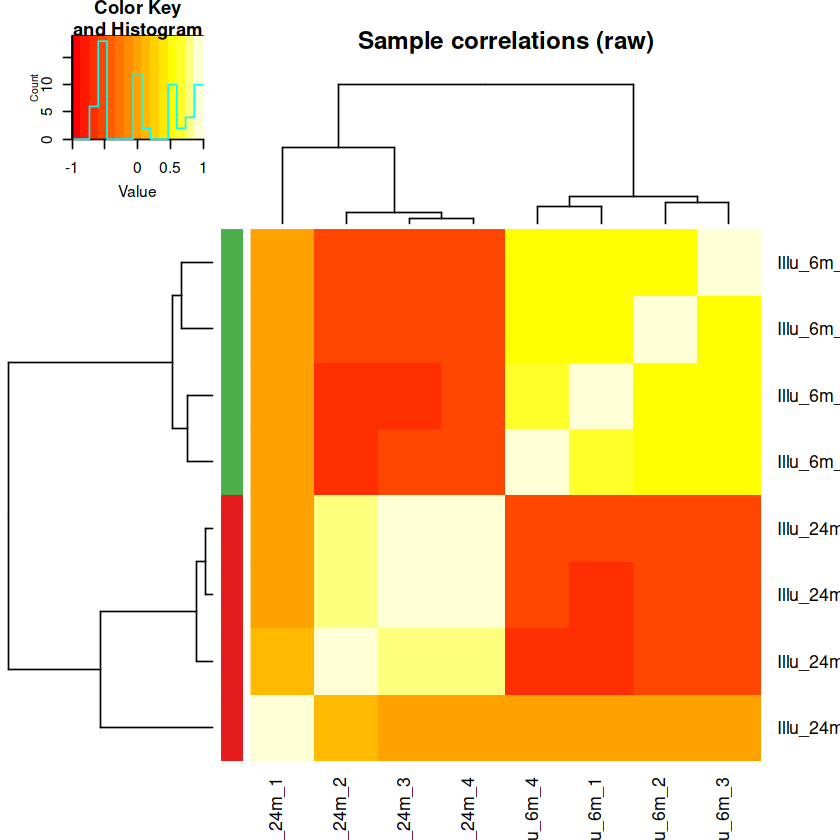

In [13]:
# add a colorbar along the heatmap with sample condition
num_conditions <- nlevels(as.factor(samples$condition))
pal <- colorRampPalette(brewer.pal(num_conditions, "Set1"))(num_conditions)
cond_colors <- pal[as.integer(as.factor(samples$condition))]

heatmap.2(cor(raw_counts), RowSideColors=cond_colors,
          trace='none', main='Sample correlations (raw)')

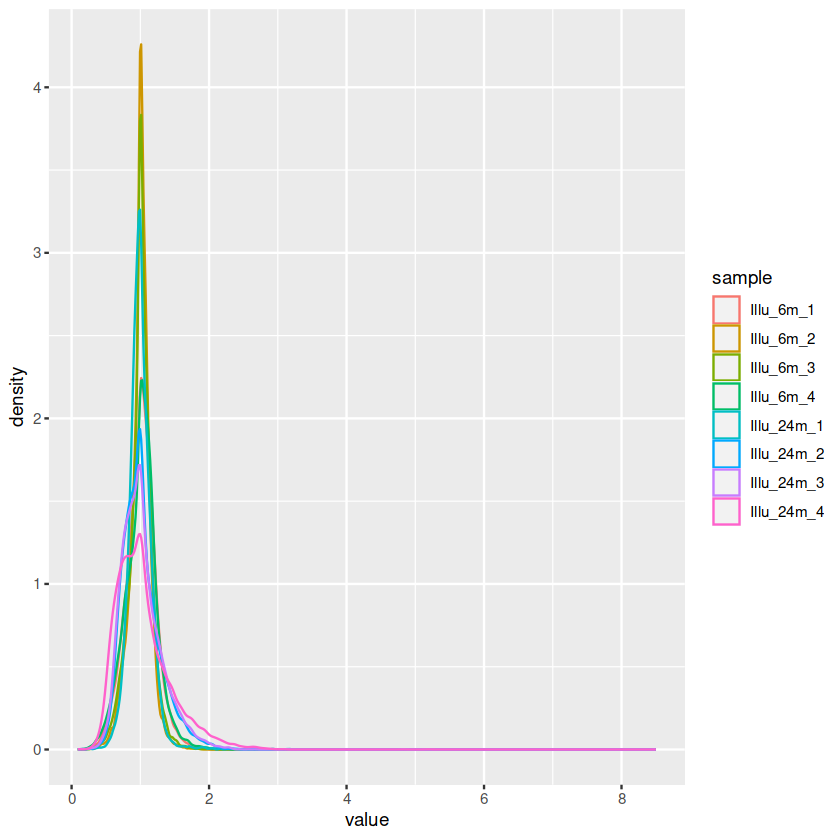

In [14]:
log_counts <- log2(raw_counts + 1)
x = melt(as.matrix(log_counts))

colnames(x) = c('gene_id', 'sample', 'value')
ggplot(x, aes(x=value, color=sample)) + geom_density()


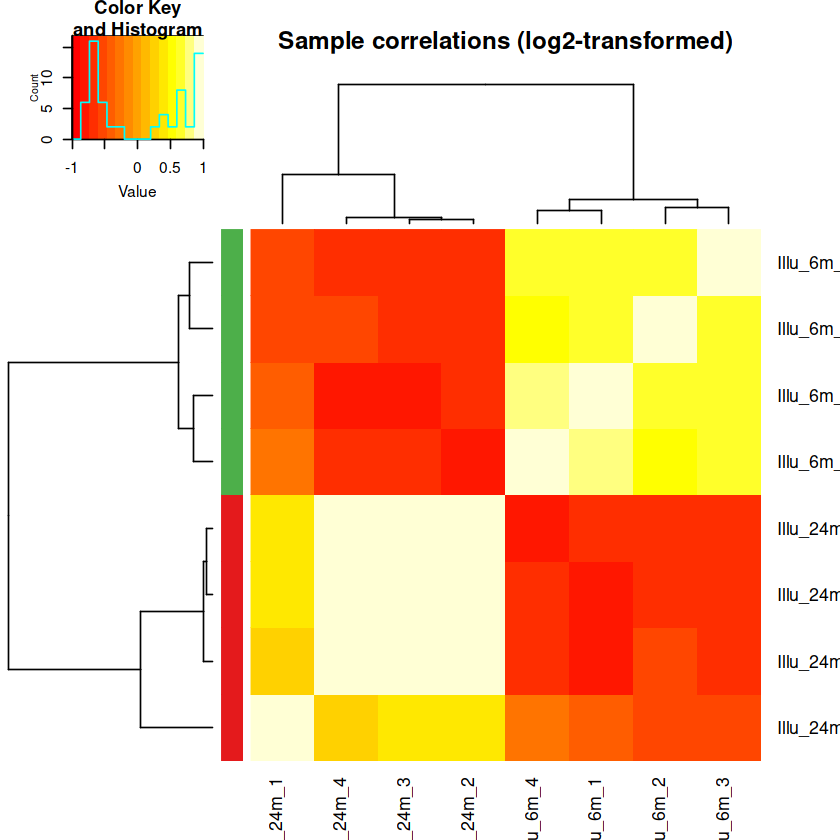

In [15]:
heatmap.2(cor(log_counts), RowSideColors=cond_colors,
          trace='none', main='Sample correlations (log2-transformed)')


### Construction of similarity matrix

In [16]:
# Similarity measure which combines elements from Pearson correlation and Euclidean distance.
 
cordist <- function(dat) {
    cor_matrix  <- cor(t(dat))

    dist_matrix <- as.matrix(dist(dat, diag=TRUE, upper=TRUE))
    dist_matrix <- log1p(dist_matrix)
    dist_matrix <- 1 - (dist_matrix / max(dist_matrix))

    sign(cor_matrix) * ((abs(cor_matrix) + dist_matrix)/ 2)
}

In [17]:
sim_matrix <- cordist(log_counts)

sim_matrix

,ENSMUSG00000092329,ENSMUSG00000007777,ENSMUSG00000020831,ENSMUSG00000107002,ENSMUSG00000058706,ENSMUSG00000060512,ENSMUSG00000090066,ENSMUSG00000030663,ENSMUSG00000028441,ENSMUSG00000037971,⋯,ENSMUSG00000039068,ENSMUSG00000118600,ENSMUSG00000115423,ENSMUSG00000116563,ENSMUSG00000105993,ENSMUSG00000113373,ENSMUSG00000118528,ENSMUSG00000118646,ENSMUSG00000107877,ENSMUSG00000115798
ENSMUSG00000092329,1.0000000,-0.8136882,-0.8014829,-0.7926374,-0.7907623,-0.7709092,0.6255285,-0.5141370,-0.7535822,-0.7963231,⋯,0.7857176,0.8741082,-0.7917003,-0.7996531,-0.5488975,-0.7388265,0.9037105,0.9392453,-0.4673244,0.9346484
ENSMUSG00000007777,-0.8136882,1.0000000,0.9310261,0.9199136,0.8906291,0.8764013,-0.6153186,0.6373572,0.8582587,0.9262684,⋯,-0.7298118,-0.7528399,0.9090181,0.9276340,0.5367846,0.8550516,-0.8348026,-0.8256322,0.5549081,-0.7888394
ENSMUSG00000020831,-0.8014829,0.9310261,1.0000000,0.9703641,0.8990426,0.9326875,-0.6227434,0.5172640,0.9112312,0.9710754,⋯,-0.7470979,-0.7416503,0.9277018,0.9407490,0.5483615,0.8097539,-0.8159151,-0.7864148,0.3977299,-0.7654889
ENSMUSG00000107002,-0.7926374,0.9199136,0.9703641,1.0000000,0.8775044,0.9107343,-0.5720575,0.5174291,0.9298789,0.9641405,⋯,-0.7602487,-0.7388620,0.9455014,0.9539555,0.5501574,0.8325647,-0.8039273,-0.7824963,0.4044124,-0.7587960
ENSMUSG00000058706,-0.7907623,0.8906291,0.8990426,0.8775044,1.0000000,0.9341340,-0.6636643,0.5454834,0.8448337,0.8929790,⋯,-0.7263949,-0.7212687,0.8430887,0.8466334,0.6859497,0.7044256,-0.7856557,-0.7582493,-0.4404345,-0.7680195
ENSMUSG00000060512,-0.7709092,0.8764013,0.9326875,0.9107343,0.9341340,1.0000000,-0.6879432,0.4755318,0.8770569,0.9200859,⋯,-0.7630206,-0.7134312,0.8536664,0.8522672,0.5909765,0.7015332,-0.7587843,-0.7304415,-0.4952856,-0.7262811
ENSMUSG00000090066,0.6255285,-0.6153186,-0.6227434,-0.5720575,-0.6636643,-0.6879432,1.0000000,0.4100067,-0.5417139,-0.5902859,⋯,0.5229169,0.5492685,-0.5364308,-0.5221081,-0.4215354,-0.3871214,0.5928430,0.5813043,0.4997234,0.5631097
ENSMUSG00000030663,-0.5141370,0.6373572,0.5172640,0.5174291,0.5454834,0.4755318,0.4100067,1.0000000,0.4806635,0.5730122,⋯,-0.5520000,-0.4879531,0.4922844,0.5495880,-0.4739967,0.5801907,-0.5367399,-0.5696287,0.6771993,-0.5218386
ENSMUSG00000028441,-0.7535822,0.8582587,0.9112312,0.9298789,0.8448337,0.8770569,-0.5417139,0.4806635,1.0000000,0.9165878,⋯,-0.7473631,-0.7063412,0.8958869,0.8893955,0.5182965,0.7703180,-0.7487243,-0.7317589,-0.3539065,-0.7245063
ENSMUSG00000037971,-0.7963231,0.9262684,0.9710754,0.9641405,0.8929790,0.9200859,-0.5902859,0.5730122,0.9165878,1.0000000,⋯,-0.7685631,-0.7444581,0.9126357,0.9373876,0.5368794,0.8159400,-0.8045856,-0.7833633,0.4013543,-0.7652381


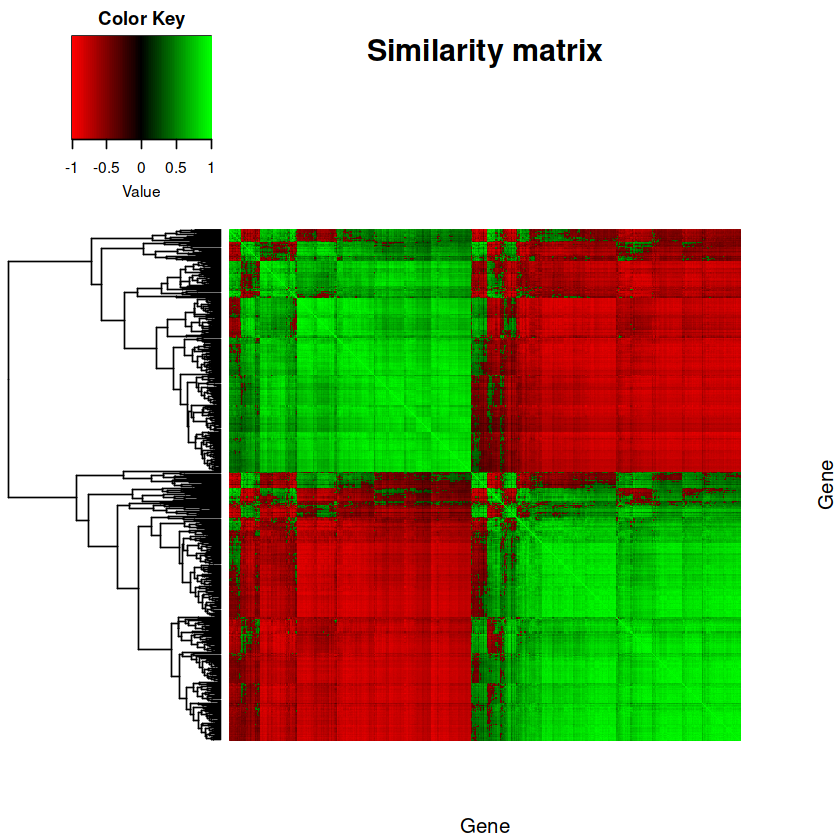

In [19]:
heatmap_indices <- sample(nrow(sim_matrix), 500)

heatmap.2(t(sim_matrix[heatmap_indices, heatmap_indices]),
            col=redgreen(75),
            labRow=NA, labCol=NA, 
            trace='none', dendrogram='row',
            xlab='Gene', ylab='Gene',
            main='Similarity matrix',
            density.info='none', revC=TRUE)


### Identification of soft threshold for using in the power in the adjaceny matrix calculation 

In [20]:
# Choose a set of soft-thresholding powers
powers <- c(c(1:10), seq(from = 12, to=40, by=2))

# Call the network topology analysis function
sft <- pickSoftThreshold(t(log_counts), powerVector = powers, verbose = 5)

pickSoftThreshold: will use block size 2784.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 2784 of 16066


Warning message:
“executing %dopar% sequentially: no parallel backend registered”
Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 1 : 2784 .”


   ..working on genes 2785 through 5568 of 16066


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 2785 : 5568 .”


   ..working on genes 5569 through 8352 of 16066


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 5569 : 8352 .”


   ..working on genes 8353 through 11136 of 16066


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 8353 : 11136 .”


   ..working on genes 11137 through 13920 of 16066


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 11137 : 13920 .”


   ..working on genes 13921 through 16066 of 16066


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 13921 : 16066 .”


   Power SFT.R.sq   slope truncated.R.sq mean.k. median.k. max.k.
1      1  0.92900  2.5100          0.915   10100     11400  12500
2      2  0.60500  0.7790          0.640    7730      9000  10800
3      3  0.24500  0.3350          0.729    6340      7440   9720
4      4  0.06830  0.1510          0.909    5400      6310   8920
5      5  0.00635  0.0429          0.960    4710      5420   8280
6      6  0.00419 -0.0321          0.977    4180      4710   7750
7      7  0.03910 -0.0941          0.984    3750      4130   7310
8      8  0.09390 -0.1410          0.986    3410      3640   6920
9      9  0.16100 -0.1810          0.981    3110      3230   6580
10    10  0.23700 -0.2150          0.981    2860      2890   6280
11    12  0.37600 -0.2740          0.968    2460      2330   5770
12    14  0.49800 -0.3210          0.951    2150      1910   5340
13    16  0.60000 -0.3590          0.941    1900      1580   4970
14    18  0.67900 -0.3940          0.923    1700      1330   4660
15    20  

### Identification of soft threshold for using in the power in the adjaceny matrix calculation 

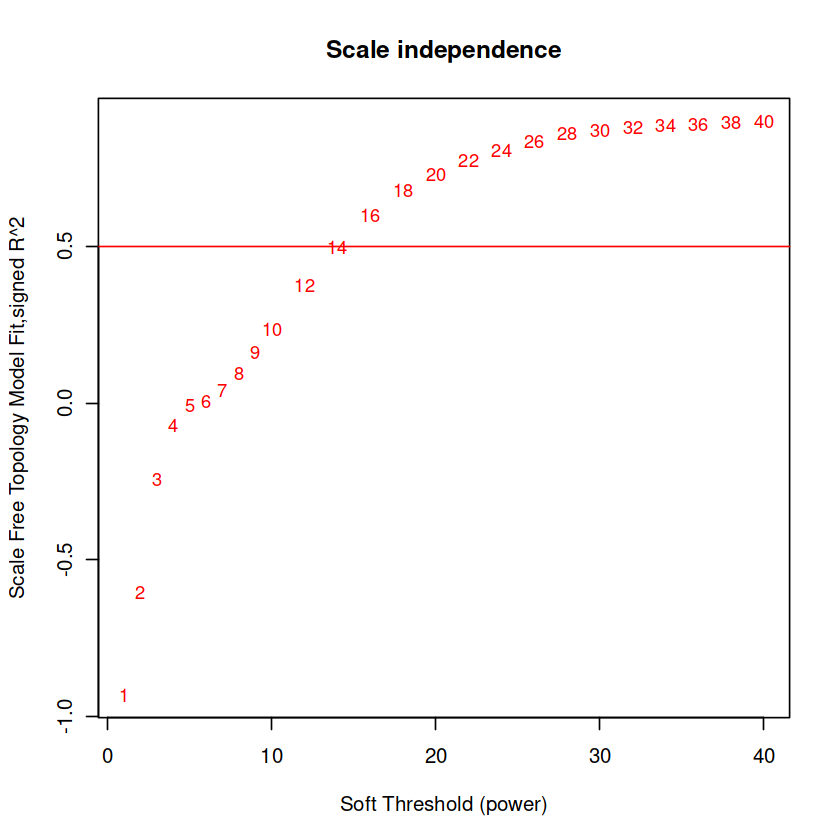

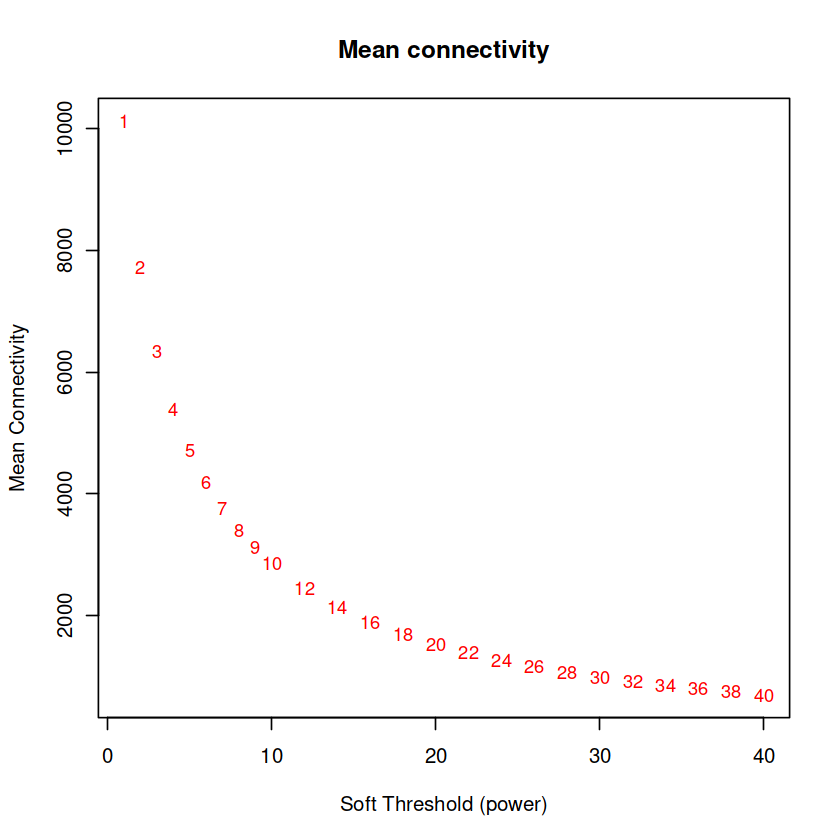

In [21]:
# Plot the results:
#sizeGrWindow(9, 5)
#par(mfrow = c(1,2))

# Set some parameters
cex1 = 0.9

# Scale-free topology fit index as a function of the soft-thresholding power
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2], 
     xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n", 
     main = paste("Scale independence"))

text(sft$fitIndices[,1], -sign(sft$fitIndices[,3]) * sft$fitIndices[,2],
     labels=powers,cex=cex1,col="red")

# this line corresponds to using an R^2 cut-off of h
abline(h=0.50,col="red")

# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1], sft$fitIndices[,5], 
     xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
     main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")

### Construction of adjaceny matrix

In [22]:
# Construct adjacency matrix
adj_matrix <- adjacency.fromSimilarity(sim_matrix, power=18, type='signed')

# Delete similarity matrix to free up memory
rm(sim_matrix)
gc()


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,3929647,209.9,7484865,399.8,7484865,399.8
Vcells,265600219,2026.4,807487268,6160.7,1561864458,11916.1


### Writing the adjacency matrix to another variable to be used for further purposes

In [23]:
head(adj_matrix, 2)

                   ENSMUSG00000092329 ENSMUSG00000007777 ENSMUSG00000020831
ENSMUSG00000092329       1.000000e+00       2.791161e-19       8.746273e-19
ENSMUSG00000007777       2.791161e-19       1.000000e+00       5.316754e-01
                   ENSMUSG00000107002 ENSMUSG00000058706 ENSMUSG00000060512
ENSMUSG00000092329       1.916939e-18       2.254135e-18       1.152384e-17
ENSMUSG00000007777       4.792150e-01       3.633909e-01       3.171928e-01
                   ENSMUSG00000090066 ENSMUSG00000030663 ENSMUSG00000028441
ENSMUSG00000092329       2.395316e-02       8.683798e-12       4.281124e-17
ENSMUSG00000007777       1.298021e-13       2.729241e-02       2.663000e-01
                   ENSMUSG00000037971 ENSMUSG00000046999 ENSMUSG00000063236
ENSMUSG00000092329       1.388077e-18       8.539752e-02       1.073081e-18
ENSMUSG00000007777       5.085838e-01       3.134556e-15       5.852461e-01
                   ENSMUSG00000040591 ENSMUSG00000035171 ENSMUSG00000032551
ENSMUSG00000

In [24]:
adj = adj_matrix

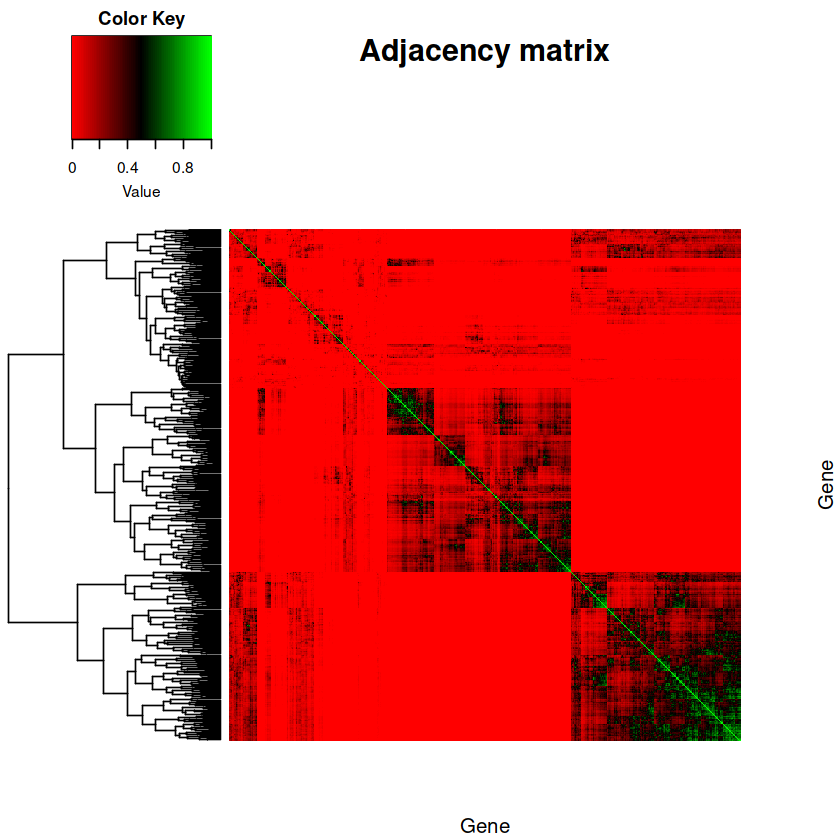

In [25]:
heatmap.2(t(adj_matrix[heatmap_indices, heatmap_indices]),
            col=redgreen(75),
            labRow=NA, labCol=NA, 
            trace='none', dendrogram='row',
            xlab='Gene', ylab='Gene',
            main='Adjacency matrix',
            density.info='none', revC=TRUE)


In [26]:
# Save the results for adjacency matrix
save(adj_matrix, file = "adjacency_matrix_short_read_6m_24m.RData");

### Initial Module detection

In [27]:
TOM = TOMsimilarity(adj_matrix,TOMType = "signed",);
dissTOM = 1-TOM

..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


In [28]:
# Save the results dissimilarity 
save(dissTOM , file = "dissTOM_matrix_short_read_6m_24m.RData");

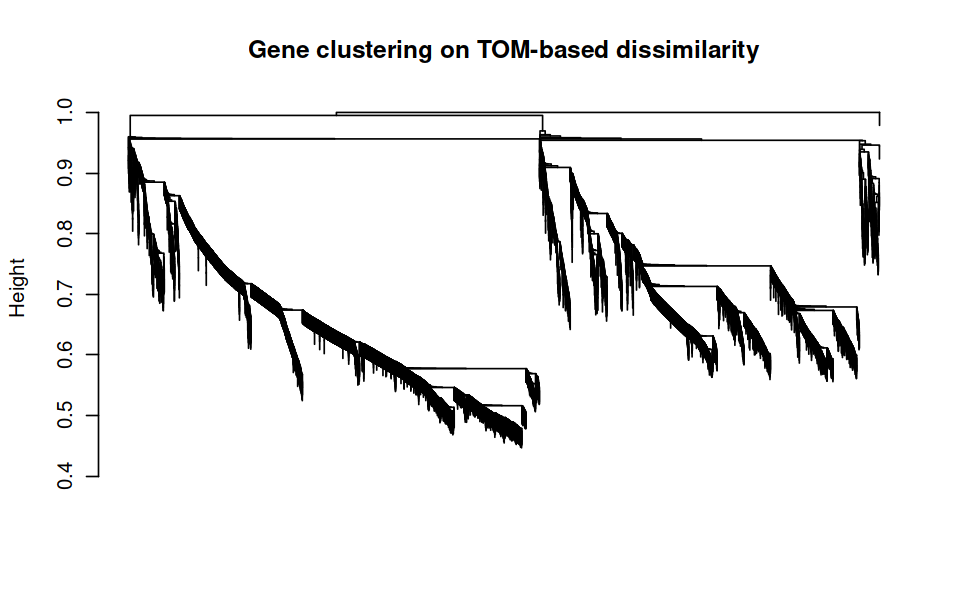

In [29]:
#To change the size of the plots in jupyter notebook
options(repr.plot.width=8, repr.plot.height=5)

# Call the hierarchical clustering function
geneTree = hclust(as.dist(dissTOM), method = "average");
# Plot the resulting clustering tree (dendrogram)
#sizeGrWindow(12,9)
plot(geneTree, xlab="", sub="", main = "Gene clustering on TOM-based dissimilarity",
labels = FALSE, hang = 0.04);

## Calculate consensus modules

In [30]:
No.Genes = nrow(log_counts);
ConsCutoffs = seq(from = 0.80, to = 0.98, by = 0.01);
No.Cutoffs = length(ConsCutoffs);
ConsensusColor = array(dim = c(No.Genes, No.Cutoffs));

for (cut in 1:No.Cutoffs)
{
    ConsensusColor[, cut] = cutreeDynamic(dendro = geneTree , distM = dissTOM ,
                                          deepSplit = 2, pamRespectsDendro = TRUE,
                                          minClusterSize = 300, cutHeight =  ConsCutoffs[cut])
}

 ..done.
 ..done.
 ..done.
 ..done.
 ..done.
 ..done.
 ..done.
 ..done.
 ..done.
 ..done.
 ..done.
 ..done.
 ..done.
 ..done.
 ..done.
 ..done.
 ..done.
 ..done.
 ..done.


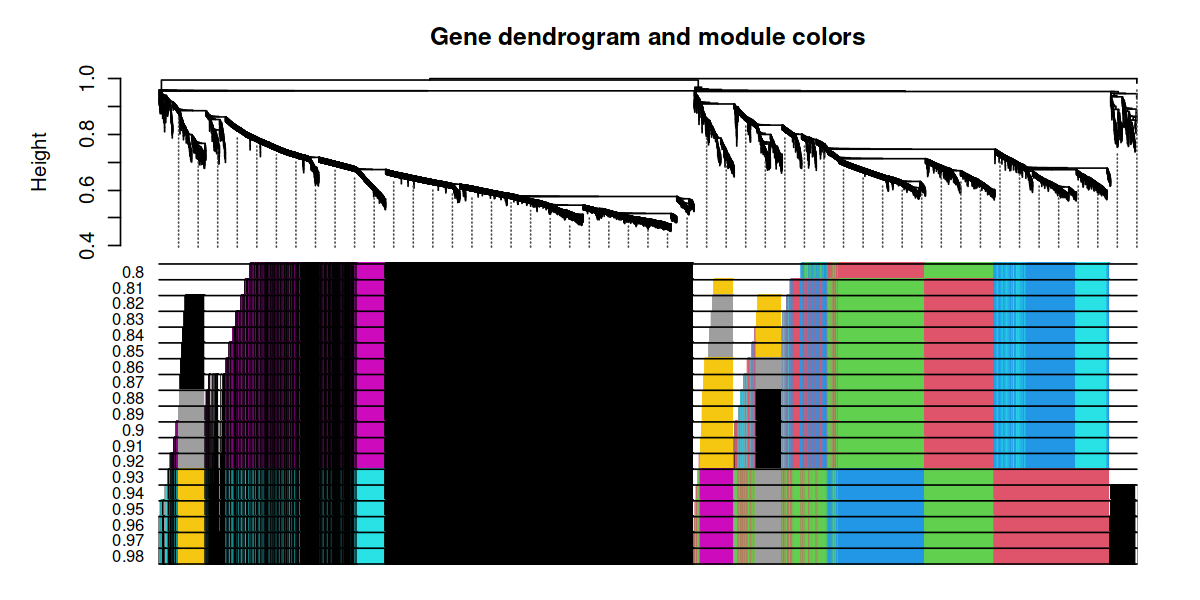

In [32]:
#To change the size of the plots in jupyter notebook
options(repr.plot.width=10, repr.plot.height=5)

Consensus_color = labels2colors(ConsensusColor)

plotDendroAndColors(geneTree, ConsensusColor,paste(ConsCutoffs),
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = TRUE, guideHang = 0.05,
                    main = "Gene dendrogram and module colors")


#ConsensusColor

In [33]:
colnames(Consensus_color) = ConsCutoffs
counts = log_counts
rownames(Consensus_color) = rownames(counts)
Consensus_module = as.data.frame(cbind(counts, Consensus_color))
head(Consensus_module,2)

,Illu_6m_1,Illu_6m_2,Illu_6m_3,Illu_6m_4,Illu_24m_1,Illu_24m_2,Illu_24m_3,Illu_24m_4,0.8,0.81,⋯,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ENSMUSG00000092329,0.6685384,0.7842788,0.7847825,0.7700672,1.1872403,1.2150681,1.3289457,1.3580571,yellow,yellow,⋯,yellow,yellow,yellow,yellow,blue,blue,blue,blue,blue,blue
ENSMUSG00000007777,1.2021988,1.1663584,1.1674389,1.0985418,0.8942308,0.7809973,0.8251928,0.7827108,turquoise,turquoise,⋯,turquoise,turquoise,turquoise,turquoise,turquoise,turquoise,turquoise,turquoise,turquoise,turquoise


## Choose the specific cut height and plot

In [34]:
dynamicModsm  = cutreeDynamic(dendro = geneTree , distM = dissTOM ,
deepSplit = 2, pamRespectsDendro = TRUE,
minClusterSize = 300, cutHeight = 0.85)
table(dynamicModsm)

 ..done.


dynamicModsm
   0    1    2    3    4    5    6    7    8    9 
1763 6878 1675 1529 1450  808  753  417  410  383 

In [36]:
# Convert numeric lables into colors
dynamicColorsm= labels2colors(dynamicModsm)
table(dynamicColorsm)
# Plot the dendrogram and colors underneath
#sizeGrWindow(8,6)

sizeGrWindow(10, 5);
pdf("Short_read_0_85_dendogram.pdf", wi=10, h=5)

par(mfrow = c(1,2))
par(mar = c(4.5,4.5,2.5,1))

plotDendroAndColors(geneTree, dynamicColorsm, "Dynamic Tree Cut",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05,
main = "Gene dendrogram and module colors")

dev.off();

dynamicColorsm
    black      blue     brown     green      grey   magenta      pink       red 
      417      1675      1529       808      1763       383       410       753 
turquoise    yellow 
     6878      1450 

png 
  2

## Finding hub genes

In [37]:
chooseOneHubInEachModule(t(counts),dynamicColorsm)

chooseTopHubInEachModule(t(counts),dynamicColorsm, 
                         omitColors = "grey",
                         power = 18,
                         type = "signed",)

black                 blue                brown 
"ENSMUSG00000037270" "ENSMUSG00000036667" "ENSMUSG00000041444" 
               green              magenta                 pink 
"ENSMUSG00000039096" "ENSMUSG00000036905" "ENSMUSG00000073096" 
                 red            turquoise               yellow 
"ENSMUSG00000020832" "ENSMUSG00000030423" "ENSMUSG00000068040"

black                 blue                brown 
"ENSMUSG00000037270" "ENSMUSG00000034336" "ENSMUSG00000031748" 
               green              magenta                 pink 
"ENSMUSG00000024201" "ENSMUSG00000024663" "ENSMUSG00000026421" 
                 red            turquoise               yellow 
"ENSMUSG00000116378" "ENSMUSG00000028741" "ENSMUSG00000020668"

## Adding the module column for the specific cut off to counts dataframe

In [38]:
#log_counts[,module_colors==which.module ]

counts = log_counts

log_counts_module = as.data.frame(cbind(counts, module=dynamicColorsm))

log_counts_module_1 = data.frame(apply(log_counts_module[1:9], 2, function(x) as.numeric(as.character(x))))
                 
#plotMat(log_counts_module)

rownames(log_counts_module_1) = rownames(counts)
                                     
log_counts_module_1["module"] =  log_counts_module["module"]  
                                       
                                       
#module_test    

log_counts_module_1  = log_counts_module_1[order(log_counts_module_1$module),] 
                                       
module_test =  log_counts_module_1["module"]                                       
                                       
log_counts_module_1                                       

Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”


,Illu_6m_1,Illu_6m_2,Illu_6m_3,Illu_6m_4,Illu_24m_1,Illu_24m_2,Illu_24m_3,Illu_24m_4,module
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSMUSG00000031242,1.0375185,0.9682627,1.0300088,0.9124037,0.9375964,0.9693537,1.0329339,1.239496,black
ENSMUSG00000037270,0.8691758,0.9906414,1.0092982,0.6720324,0.6909415,1.1851399,1.0546525,1.357943,black
ENSMUSG00000020620,0.9478151,0.9805606,1.0262208,0.9221299,0.7468484,1.0231744,1.0191810,1.169183,black
ENSMUSG00000015143,0.8742124,1.0037781,0.9962120,0.9117203,0.8950328,1.1448926,1.1579882,1.212219,black
ENSMUSG00000057899,0.8291993,1.3191240,1.1463895,0.7143789,0.8370614,1.4934086,0.8291993,1.244237,black
ENSMUSG00000015961,0.8687174,1.0281860,0.9712523,0.7376049,0.9666245,1.1746439,1.1138573,1.237160,black
ENSMUSG00000024527,0.9429677,1.0067369,0.9932315,0.8872908,0.8977762,1.0220377,1.0915918,1.156537,black
ENSMUSG00000021681,0.8696777,0.9935379,1.0342879,0.8475423,0.8174115,1.0064333,1.0251694,1.148880,black
ENSMUSG00000028842,0.9885376,0.9489414,1.0304673,0.9532362,0.9265456,1.0113721,1.0745022,1.180877,black


In [39]:
write.csv(log_counts_module_1 ,"Short_read_wgnca_signed_0.85_Gene_wise_RMN.csv")

,MEblack,MEblue,MEbrown,MEgreen,MEgrey,MEmagenta,MEpink,MEred,MEturquoise,MEyellow
MEblack,1.00,0.88,0.75,0.380,0.53,-0.850,-0.24,-0.95,-0.69,0.61
MEblue,0.88,1.00,0.97,0.740,0.10,-0.640,0.16,-0.96,-0.94,0.90
MEbrown,0.75,0.97,1.00,0.870,-0.13,-0.440,0.38,-0.87,-0.99,0.97
MEgreen,0.38,0.74,0.87,1.000,-0.57,0.028,0.77,-0.54,-0.93,0.96
MEgrey,0.53,0.10,-0.13,-0.570,1.00,-0.780,-0.92,-0.35,0.23,-0.34
MEmagenta,-0.85,-0.64,-0.44,0.028,-0.78,1.000,0.65,0.82,0.33,-0.23
MEpink,-0.24,0.16,0.38,0.770,-0.92,0.650,1.00,0.11,-0.50,0.58
MEred,-0.95,-0.96,-0.87,-0.540,-0.35,0.820,0.11,1.00,0.80,-0.74
MEturquoise,-0.69,-0.94,-0.99,-0.930,0.23,0.330,-0.50,0.80,1.00,-0.99
MEyellow,0.61,0.90,0.97,0.960,-0.34,-0.230,0.58,-0.74,-0.99,1.00


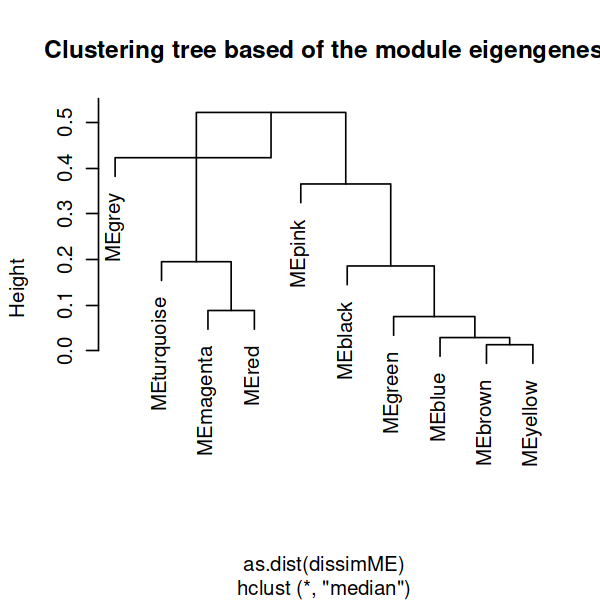

In [41]:
#To change the size of the plots in jupyter notebook
options(repr.plot.width=5, repr.plot.height=5)

datME=moduleEigengenes(t(log_counts), colors = dynamicColorsm)$eigengenes
signif(cor(datME, use="p"), 2)

dissimME=(1-t(cor(datME, method="p")))/2
hclustdatME=hclust(as.dist(dissimME), method="median" )

# Plot the eigengene dendrogram
par(mfrow=c(1,1))
plot(hclustdatME, main="Clustering tree based of the module eigengenes")

In [ ]:
sizeGrWindow(10, 5);
pdf("Short_read_0_85_dendogram_ME.pdf", wi=10, h=5)

par(mfrow = c(1,1))
par(mar = c(4.5,4.5,2.5,1))

plot(hclustdatME, main="Clustering tree based of the module eigengenes")

dev.off();

### Identification of similar modules to be merged

 mergeCloseModules: Merging modules whose distance is less than 0.005
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 10 module eigengenes in given set.
   Calculating new MEs...
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 10 module eigengenes in given set.
      ..principal component calculation for module grey failed with the following error:
           Error in svd(datModule, nu = min(n, p, nPC), nv = min(n, p, nPC)) : 
  infinite or missing values in 'x'
       ..hub genes will be used instead of principal components.


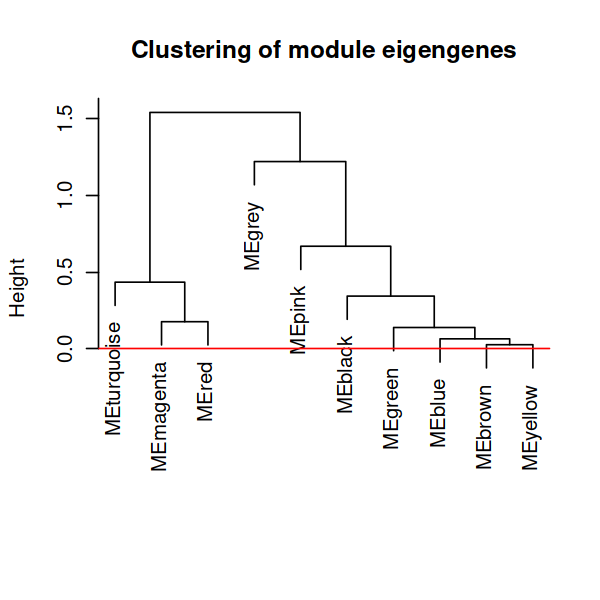

In [43]:
# Calculate eigengenes
MEList = moduleEigengenes(t(log_counts), colors = dynamicColorsm)

MEs = MEList$eigengenes
# Calculate dissimilarity of module eigengenes
MEDiss = 1-cor(MEs);
# Cluster module eigengenes
METree = hclust(as.dist(MEDiss), method = "average");
# Plot the result
#sizeGrWindow(7, 6)
plot(METree, main = "Clustering of module eigengenes",
xlab = "", sub = "")

MEDissThres = 0.005
# Plot the cut line into the dendrogram
abline(h=MEDissThres, col = "red")
# Call an automatic merging function
merge = mergeCloseModules(t(log_counts), dynamicColorsm, cutHeight = MEDissThres, verbose = 3)
# The merged module colors
mergedColors = merge$colors;
# Eigengenes of the new merged modules:
mergedMEs = merge$newMEs;

In [128]:
counts_2 = log_counts

log_counts_module_2 = as.data.frame(cbind(counts_2, module=mergedColors))

log_counts_module_3 = data.frame(apply(log_counts_module_2[1:9], 2, function(x) as.numeric(as.character(x))))
                 
#plotMat(log_counts_module)

rownames(log_counts_module_3) = rownames(counts)
                                     
log_counts_module_3["module"] =  log_counts_module_2["module"]  
                                       
#module_test    

log_counts_module_3  = log_counts_module_3[order(log_counts_module_3$module),] 
                                       
module_test =  log_counts_module_3["module"]                                         
                                       

log_counts_module_3

Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”


,Illu_6m_1,Illu_6m_2,Illu_6m_3,Illu_6m_4,Illu_24m_1,Illu_24m_2,Illu_24m_3,Illu_24m_4,module
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSMUSG00000023873,0.9296107,1.0227201,0.9769164,1.0561431,1.120752,1.1312445,0.9053631,0.9769164,black
ENSMUSG00000018479,0.5305147,1.1277555,0.7369656,1.2674803,1.752907,0.9730330,0.8598223,1.0264722,black
ENSMUSG00000032062,0.9765410,0.9832826,0.9697678,1.0165259,1.365153,0.9492552,1.0933172,1.1302325,black
ENSMUSG00000050345,0.9682911,0.9027028,0.7618403,1.0310269,1.359081,1.0310269,1.0911479,0.8339900,black
ENSMUSG00000047878,0.9250769,1.0029175,0.9065012,1.0374747,1.420139,1.0767723,0.9970766,0.9494782,black
ENSMUSG00000089844,0.8930848,1.0995357,0.7369656,0.5618789,3.355875,0.9652346,1.4405726,1.0339473,black
ENSMUSG00000092210,0.7369656,1.0780025,0.9175378,1.0780025,1.548893,0.7997013,0.6713773,1.3536370,black
ENSMUSG00000036678,0.9883900,1.0115173,0.8313622,0.9687583,1.409297,1.0123514,1.0115173,0.9304409,black
ENSMUSG00000028125,1.0692538,0.8848538,0.7816692,1.0039673,1.541951,1.2699230,0.9960217,0.9822980,black


In [44]:
#write.csv(log_counts_module_3 ,"Short_read_signed_0.85_merged.csv")


### Dendogram for inital and merged modules 

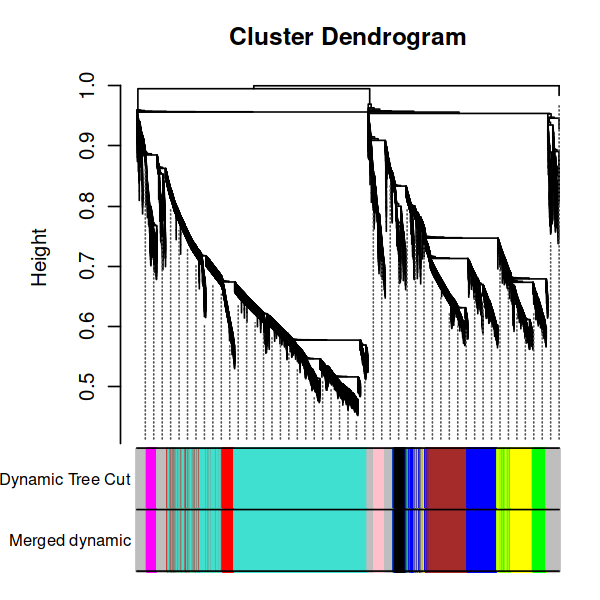

In [45]:
#sizeGrWindow(12, 9)
#pdf(file = "Plots/geneDendro-3.pdf", wi = 9, he = 6)
plotDendroAndColors(geneTree, cbind(dynamicColorsm, mergedColors),
c("Dynamic Tree Cut", "Merged dynamic"),
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)
#dev.off()

### Overall number of genes in each module 

In [46]:
#initial
table(dynamicColorsm)
#merged
table(mergedColors)


dynamicColorsm
    black      blue     brown     green      grey   magenta      pink       red 
      417      1675      1529       808      1763       383       410       753 
turquoise    yellow 
     6878      1450 

mergedColors
    black      blue     brown     green      grey   magenta      pink       red 
      417      1675      1529       808      1763       383       410       753 
turquoise    yellow 
     6878      1450 